In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import warnings
 warnings.filterwarnings('ignore')
 import joblib
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import classification_report
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import confusion_matrix
 import seaborn as sns
 import os
 from sklearn.svm import SVC
 import os
 from sklearn.preprocessing import LabelEncoder
 from sklearn.metrics import precision_score
 from sklearn.metrics import recall_score
 from sklearn.metrics import f1_scor

In [2]:
dataset = pd.read_csv("Dataset/UNSW_NB.csv")
dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [3]:
dataset.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,30,0,0,0,30,30,0,Generic,1


In [4]:
dataset.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
id                   175341 non-null int64
dur                  175341 non-null float64
proto                175341 non-null object
service              175341 non-null object
state                175341 non-null object
spkts                175341 non-null int64
dpkts                175341 non-null int64
sbytes               175341 non-null int64
dbytes               175341 non-null int64
rate                 175341 non-null float64
sttl                 175341 non-null int64
dttl                 175341 non-null int64
sload                175341 non-null float64
dload                175341 non-null float64
sloss                175341 non-null int64
dloss                175341 non-null int64
sinpkt               175341 non-null float64
dinpkt               175341 non-null float64
sjit                 175341 non-null float64
djit                 175341 non-null float64
swin      

In [6]:
dataset.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [7]:
le = LabelEncoder()
#Apply labelencoder to object type column
for col in dataset.select_dtypes(include="object").columns:
    dataset[col]=le.fit_transform(dataset[col].astype(str))
dataset.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [8]:
dataset['label'].unique()

array([0, 1], dtype=int64)

In [9]:
le=LabelEncoder()
dataset["label"]=le.fit_transform(dataset["label"])

In [10]:
x=dataset.iloc[:,0:44]
x

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,6
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,6
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,6
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,6
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,119,2,3,2,0,114,0,111111.107200,...,24,13,24,0,0,0,24,24,0,5
175337,175338,0.505762,113,0,2,10,8,620,354,33.612649,...,1,1,2,0,0,0,1,1,0,8
175338,175339,0.000009,119,2,3,2,0,114,0,111111.107200,...,3,3,13,0,0,0,3,12,0,5
175339,175340,0.000009,119,2,3,2,0,114,0,111111.107200,...,30,14,30,0,0,0,30,30,0,5


In [11]:
y=dataset.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(140272, 44)

In [14]:
X_test.shape

(35069, 44)

In [15]:
precision = []
recall = []
fscore = []
accuracy = []


In [16]:
labels=['Intrusion detected','NO intrusion detected']

In [17]:
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro')*100
    r = recall_score(testY, predict,average='macro')*100
    f = f1_score(testY, predict,average='macro')*100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(r)
    recall.append(r)
    fscore.append(f)
    print(algorithm+'   Accuracy  : '+str(a))
    print(algorithm+'   Precision : '+str(p))
    print(algorithm+'   recall    : '+str(r))
    print(algorithm+'   FSCORE    : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print("\n",algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY,predict)
    plt.figure(figsize=(5,5))
    ax=sns.heatmap(conf_matrix,xticklabels=labels,yticklabels=labels,annot=True,cmap="Blues",fmt="g");
    ax.set_ylim([0, len(labels)])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

# Existing Methodology (Support Vector Machine) 

SupportVectorMachine   Accuracy  : 88.11771079871112
SupportVectorMachine   Precision : 90.7175639739636
SupportVectorMachine   recall    : 82.1993851781174
SupportVectorMachine   FSCORE    : 84.90331621163268

 SupportVectorMachine classification report
                        precision    recall  f1-score   support

   Intrusion detected       0.66      0.95      0.78      7718
NO intrusion detected       0.99      0.86      0.92     27351

             accuracy                           0.88     35069
            macro avg       0.82      0.91      0.85     35069
         weighted avg       0.91      0.88      0.89     35069



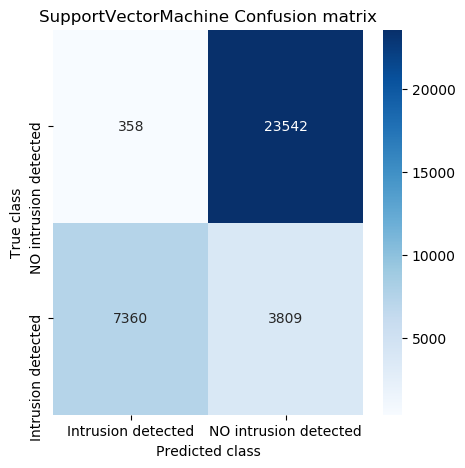

In [18]:
# Check if the pkl file exists
if os.path.exists('SupportVectorMachine_weights.pkl'):
 # Load the model from the pkl file
    classifier= joblib.load('SupportVectorMachine_weights.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("SupportVectorMachine", predict, y_test)
else:
    classifier = SVC()
 # Train the classifier on the training data
    classifier.fit(X_train, y_train)
 # Make predictions on the test data
    predict=classifier.predict(X_test)
    joblib.dump(classifier,'SupportVectorMachine_weights.pkl')
    print("SupportVectorMachine model trained and model weights saved.")
    calculateMetrics("SupportVectorMachine", predict, y_test)

# Proposed Methodology (Random Forest Classifier)

RF Classifier   Accuracy  : 100.0
RF Classifier   Precision : 100.0
RF Classifier   recall    : 100.0
RF Classifier   FSCORE    : 100.0

 RF Classifier classification report
                        precision    recall  f1-score   support

   Intrusion detected       1.00      1.00      1.00     11169
NO intrusion detected       1.00      1.00      1.00     23900

             accuracy                           1.00     35069
            macro avg       1.00      1.00      1.00     35069
         weighted avg       1.00      1.00      1.00     35069



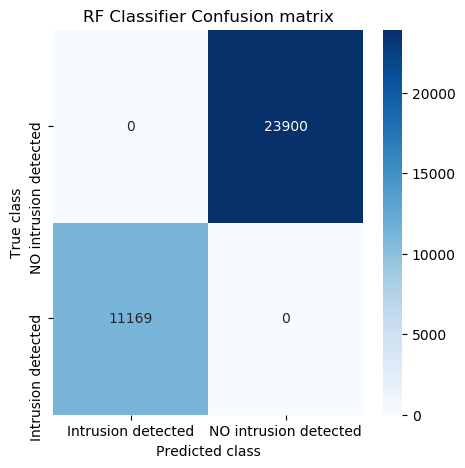

In [19]:
if os.path.exists("RFC_weights.pkl"):
    classifier=joblib.load("RFC_weights.pkl")
    predict=classifier.predict(X_test)
    calculateMetrics("RF Classifier",predict,y_test)
else:
    classifier=RandomForestClassifier()
    classifier.fit(X_train, y_train)
    predict=classifier.predict(X_test)
    joblib.dump(classifier, "RFC_weights.pkl")
    print("Randomforestclassifier model trained and model weights saved.")
    calculateMetrics("RF Classifier",predict,y_test)

# Testing

In [20]:
test=pd.read_csv("Dataset/test.csv")
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,107651,0.000005,120,0,3,2,0,200,0,200000.005100,...,2,2,8,0,0,0,2,8,0,3
1,61335,0.000006,119,0,3,2,0,104,0,166666.660800,...,1,1,4,0,0,0,1,4,0,4
2,89804,0.000005,118,0,3,2,0,200,0,200000.005100,...,4,4,17,0,0,0,4,12,0,3
3,104973,2.293522,113,5,2,34,172,1824,217197,89.382186,...,2,1,1,0,0,1,2,1,0,2
4,104005,1.617986,113,0,2,10,8,564,354,10.506890,...,1,1,1,0,0,0,4,3,0,7
5,25551,1.004811,113,5,2,12,18,1580,10168,28.861148,...,1,1,1,0,0,1,2,1,0,6
6,10683,0.004626,113,0,2,18,18,3744,2456,7565.931961,...,1,1,3,0,0,0,5,3,0,6
7,84922,0.000009,120,0,3,2,0,200,0,111111.107200,...,4,4,10,0,0,0,5,7,0,2
8,133790,0.000008,119,2,3,2,0,114,0,125000.000300,...,13,13,33,0,0,0,13,33,0,5
9,81412,0.000010,119,0,3,2,0,168,0,100000.002500,...,1,1,1,0,0,0,1,1,0,7


In [21]:
le = LabelEncoder()
#Apply labelencoder to object type column
for col in test.select_dtypes(include="object").columns:
    test[col]=le.fit_transform(test[col].astype(str))
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,107651,0.000005,120,0,3,2,0,200,0,200000.005100,...,2,2,8,0,0,0,2,8,0,3
1,61335,0.000006,119,0,3,2,0,104,0,166666.660800,...,1,1,4,0,0,0,1,4,0,4
2,89804,0.000005,118,0,3,2,0,200,0,200000.005100,...,4,4,17,0,0,0,4,12,0,3
3,104973,2.293522,113,5,2,34,172,1824,217197,89.382186,...,2,1,1,0,0,1,2,1,0,2
4,104005,1.617986,113,0,2,10,8,564,354,10.506890,...,1,1,1,0,0,0,4,3,0,7


In [22]:
classifier=joblib.load("RFC_weights.pkl")
predict=classifier.predict(test)
predict

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [23]:
test['predicted'] = predict

In [24]:
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,predicted
0,107651,0.000005,120,0,3,2,0,200,0,200000.005100,...,2,8,0,0,0,2,8,0,3,1
1,61335,0.000006,119,0,3,2,0,104,0,166666.660800,...,1,4,0,0,0,1,4,0,4,1
2,89804,0.000005,118,0,3,2,0,200,0,200000.005100,...,4,17,0,0,0,4,12,0,3,1
3,104973,2.293522,113,5,2,34,172,1824,217197,89.382186,...,1,1,0,0,1,2,1,0,2,1
4,104005,1.617986,113,0,2,10,8,564,354,10.506890,...,1,1,0,0,0,4,3,0,7,1
5,25551,1.004811,113,5,2,12,18,1580,10168,28.861148,...,1,1,0,0,1,2,1,0,6,0
6,10683,0.004626,113,0,2,18,18,3744,2456,7565.931961,...,1,3,0,0,0,5,3,0,6,0
7,84922,0.000009,120,0,3,2,0,200,0,111111.107200,...,4,10,0,0,0,5,7,0,2,1
8,133790,0.000008,119,2,3,2,0,114,0,125000.000300,...,13,33,0,0,0,13,33,0,5,1
9,81412,0.000010,119,0,3,2,0,168,0,100000.002500,...,1,1,0,0,0,1,1,0,7,1


In [25]:
mapping = {0:'Intrusin detected',1:'No intrusion'}

In [26]:
test['predicted'] = test['predicted'].map(mapping)

In [27]:
test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,predicted
0,107651,0.000005,120,0,3,2,0,200,0,200000.005100,...,2,8,0,0,0,2,8,0,3,No intrusion
1,61335,0.000006,119,0,3,2,0,104,0,166666.660800,...,1,4,0,0,0,1,4,0,4,No intrusion
2,89804,0.000005,118,0,3,2,0,200,0,200000.005100,...,4,17,0,0,0,4,12,0,3,No intrusion
3,104973,2.293522,113,5,2,34,172,1824,217197,89.382186,...,1,1,0,0,1,2,1,0,2,No intrusion
4,104005,1.617986,113,0,2,10,8,564,354,10.506890,...,1,1,0,0,0,4,3,0,7,No intrusion
5,25551,1.004811,113,5,2,12,18,1580,10168,28.861148,...,1,1,0,0,1,2,1,0,6,Intrusin detected
6,10683,0.004626,113,0,2,18,18,3744,2456,7565.931961,...,1,3,0,0,0,5,3,0,6,Intrusin detected
7,84922,0.000009,120,0,3,2,0,200,0,111111.107200,...,4,10,0,0,0,5,7,0,2,No intrusion
8,133790,0.000008,119,2,3,2,0,114,0,125000.000300,...,13,33,0,0,0,13,33,0,5,No intrusion
9,81412,0.000010,119,0,3,2,0,168,0,100000.002500,...,1,1,0,0,0,1,1,0,7,No intrusion
